In [68]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import numpy as np

from linearmodels.panel import PanelOLS
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

In [69]:
#decide which df to use
df = pd.read_csv("Dataframes/economic_story_regression.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]
X_var_names = ["Revenue - Actual", "Earnings Per Share - Actual Surprise", "Enterprise Value", "Earnings Per Share - Actual Surprise AbsVals", "Recommendation change", "Recommendation - Mean (1-5).1", "Recommendation - Mean (1-5)"]
df = df.drop(["Earnings Per Share - Actual Surprise"], axis=1)
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df

,Instrument,Date,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5),Recommendation change,...,Price Target - Standard Deviation,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,AVY.N,2013-01-01,11.178,Materials,3.625620,3.426001e+09,1.532200e+09,7.0,3.00000,0.00000,...,2.44949,0.799347,10.637479,207295.0,-1,22.538500,0.166000,0.359537,76.666667,7.733333
1,AVY.N,2013-04-01,2.482,Materials,2.046169,4.309428e+09,1.498900e+09,7.0,2.87500,-0.12500,...,3.92272,0.895787,24.148726,0.0,-1,23.468125,0.143750,0.360572,81.666667,7.533333
2,AVY.N,2013-07-01,1.068,Materials,1.551601,4.258229e+09,1.552300e+09,8.0,2.87500,0.00000,...,4.30946,0.906078,-0.054218,0.0,-1,24.099219,0.125625,0.463789,81.566667,7.233333
3,AVY.N,2013-10-01,8.095,Materials,2.775994,4.273414e+09,1.504900e+09,7.0,2.62500,-0.25000,...,3.45230,0.903176,2.467620,236291.0,-1,19.740938,0.125806,0.441854,76.933333,6.933333
4,AVY.N,2014-01-01,1.471,Materials,3.204412,4.877168e+09,1.583900e+09,8.0,2.33333,-0.29167,...,3.42555,0.920659,16.003852,157761.0,-1,19.563770,0.126230,0.465460,80.933333,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,POOL.OQ,2021-10-01,17.194,Retailing,2.836295,1.742020e+10,1.411448e+09,8.0,2.30000,0.00000,...,50.48823,3.684400,-5.130322,157740.0,-1,43.036308,0.140755,0.382645,69.900000,4.200000
19197,POOL.OQ,2022-01-01,40.267,Retailing,3.269867,2.268979e+10,1.035557e+09,8.0,2.30000,0.00000,...,41.33833,4.504382,30.489705,82349.0,-1,52.695806,0.467234,0.380946,63.133333,3.800000
19198,POOL.OQ,2022-04-01,34.342,Retailing,6.630736,1.696712e+10,1.412650e+09,9.0,2.00000,-0.30000,...,37.49206,3.422880,-25.160664,290897.0,-1,50.457581,1.394118,0.495588,57.866667,3.600000
19199,POOL.OQ,2022-07-01,1.503,Retailing,3.625249,1.405795e+10,2.055818e+09,9.0,2.20000,0.20000,...,57.57373,2.749481,-21.661570,185584.0,-1,49.861562,2.885882,0.423045,56.100000,3.566667


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19201 entries, 0 to 19200
Data columns (total 21 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Instrument                                                     19201 non-null  object        
 1   Date                                                           19201 non-null  datetime64[ns]
 2   Earnings Per Share - Actual Surprise AbsVals                   19201 non-null  float64       
 3   GICS Industry Group Name                                       19201 non-null  object        
 4   Earnings Per Share – Coefficient of Variation                  19201 non-null  float64       
 5   Market Capitalization                                          19167 non-null  float64       
 6   Revenue - Actual                                               19166 non-null  float64       


In [71]:
df.isna().sum()

Instrument                                                         0
Date                                                               0
Earnings Per Share - Actual Surprise AbsVals                       0
GICS Industry Group Name                                           0
Earnings Per Share – Coefficient of Variation                      0
Market Capitalization                                             34
Revenue - Actual                                                  35
Number of Analysts                                                 0
Recommendation - Mean (1-5)                                      776
Recommendation change                                            993
Recommendation - Mean (1-5).1                                    992
Price Target - Standard Deviation                                776
Enterprise Value To Sales (Daily Time Series Ratio)               71
3 Month Total Return                                              25
Volume                            

In [72]:
df.describe()

,Earnings Per Share - Actual Surprise AbsVals,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5),Recommendation change,Recommendation - Mean (1-5).1,Price Target - Standard Deviation,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
count,19201.000000,19201.000000,1.916700e+04,1.916600e+04,19201.000000,18425.000000,18208.000000,18209.000000,18425.000000,19130.000000,19176.000000,1.920100e+04,19201.000000,19201.000000,19201.000000,19201.000000,19201.000000,19201.000000
mean,16.701591,5.705246,5.068830e+10,5.940188e+09,17.606010,2.325147,-0.000259,2.327693,11.836322,4.866827,4.037807,1.121231e+06,-0.847560,38.285166,0.962644,0.389302,85.740991,5.249713
std,36.689541,32.707179,1.208771e+11,1.175087e+10,7.282837,0.376284,0.125966,0.375648,25.279186,10.555401,15.214403,3.146264e+06,0.529879,15.664146,1.010914,0.079476,12.186794,1.822286
min,0.000000,-1025.000000,5.515891e+07,-9.010000e+09,1.000000,1.000000,-1.166670,1.000000,0.000000,-22.252345,-83.536836,0.000000e+00,-1.000000,17.441587,0.100000,0.142248,56.100000,3.566667
25%,2.670000,1.874267,1.118462e+10,1.009650e+09,13.000000,2.047620,-0.063160,2.050000,4.080080,1.817059,-4.011721,0.000000e+00,-1.000000,27.293281,0.143750,0.360572,76.933333,3.833333
50%,6.701000,3.275962,2.061773e+10,2.368000e+09,17.000000,2.294120,0.000000,2.296300,7.034510,3.271486,3.914849,4.404300e+05,-1.000000,36.665781,0.552903,0.405435,90.733333,4.900000
75%,15.199000,6.572211,4.357074e+10,5.146300e+09,22.000000,2.571430,0.062500,2.576920,12.532090,5.713368,11.932236,1.097422e+06,-1.000000,45.337500,1.808621,0.441854,96.366667,6.066667
max,503.622000,1642.812172,2.892120e+12,1.528710e+11,49.000000,3.692310,1.000000,4.000000,1178.120860,825.404875,232.448133,1.752907e+08,1.000000,104.666825,4.230000,0.535177,98.933333,12.966667


In [73]:
industry = df.loc[:, ["Instrument", "Date","GICS Industry Group Name", "Earnings Per Share - Actual Surprise AbsVals"]]
industry

,Instrument,Date,GICS Industry Group Name,Earnings Per Share - Actual Surprise AbsVals
0,AVY.N,2013-01-01,Materials,11.178
1,AVY.N,2013-04-01,Materials,2.482
2,AVY.N,2013-07-01,Materials,1.068
3,AVY.N,2013-10-01,Materials,8.095
4,AVY.N,2014-01-01,Materials,1.471
...,...,...,...,...
19196,POOL.OQ,2021-10-01,Retailing,17.194
19197,POOL.OQ,2022-01-01,Retailing,40.267
19198,POOL.OQ,2022-04-01,Retailing,34.342
19199,POOL.OQ,2022-07-01,Retailing,1.503


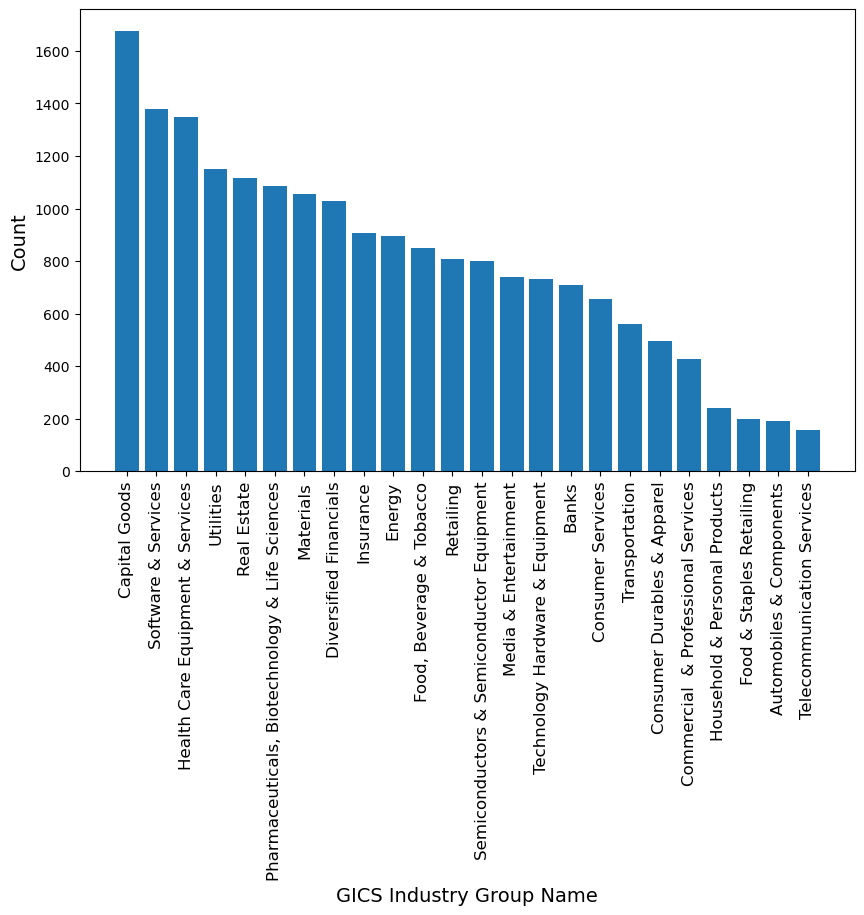

In [74]:
industry_counts = industry['GICS Industry Group Name'].value_counts()

# Create a bar plot of the count of each 'GICS Industry Group Name'
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(industry_counts.index, industry_counts.values)
plt.xlabel('GICS Industry Group Name', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set the font size and rotation of the x-axis tick labels
plt.xticks(fontsize=12, rotation=90)
plt.show()

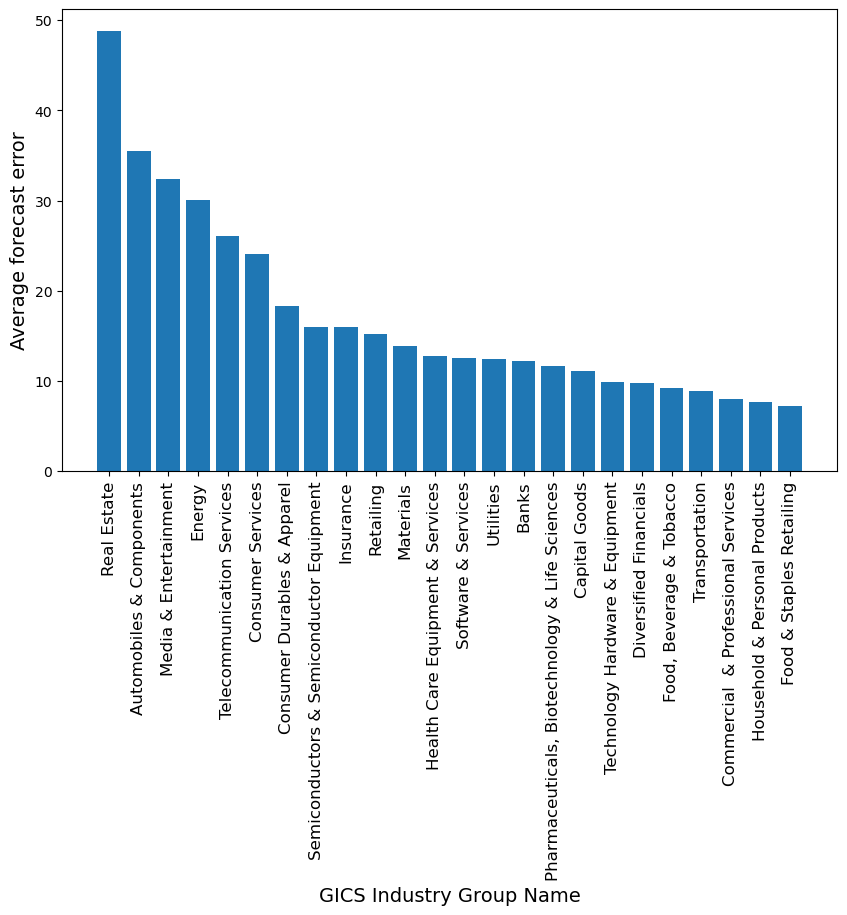

In [75]:
df_industry = df.groupby('GICS Industry Group Name')['Earnings Per Share - Actual Surprise AbsVals'].mean()

# Sort the grouped DataFrame by the values of 'Earnings Per Share - Actual Surprise AbsVals' in descending order
df_industry = df_industry.sort_values(ascending=False)

# Create a bar plot of the average forecast error by GICS Industry Group Name
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(df_industry.index, df_industry.values)
plt.xlabel('GICS Industry Group Name', fontsize=14)
plt.ylabel('Average forecast error', fontsize=14)

# Set the font size and rotation of the x-axis tick labels
plt.xticks(fontsize=12, rotation=90)

plt.show()

In [82]:
industry_df = df.groupby('GICS Industry Group Name').agg({
    'Earnings Per Share - Actual Surprise AbsVals': ['mean', 'median', 'std', 'count']
})

# Flatten the column index of the grouped DataFrame
industry_df.columns = ['_'.join(col).strip() for col in industry_df.columns.values]


# Sort the dataframe by the 'mean' column in descending order
industry_df = industry_df.sort_values(by=('Earnings Per Share - Actual Surprise AbsVals_count'), ascending=False)


# Print the resulting grouped DataFrame with descriptive stats per industry
industry_df.head(8)

,Earnings Per Share - Actual Surprise AbsVals_mean,Earnings Per Share - Actual Surprise AbsVals_median,Earnings Per Share - Actual Surprise AbsVals_std,Earnings Per Share - Actual Surprise AbsVals_count
GICS Industry Group Name,,,,
Capital Goods,11.070170,5.8100,19.264072,1675
Software & Services,12.515218,5.5550,26.800492,1380
Health Care Equipment & Services,12.775365,5.1860,31.546876,1350
Utilities,12.411400,6.1495,26.311485,1150
Real Estate,48.773824,19.5170,73.031737,1117
"Pharmaceuticals, Biotechnology & Life Sciences",11.709687,6.5420,17.449752,1085
Materials,13.861011,5.8040,29.237323,1054
Diversified Financials,9.769040,5.0395,19.169438,1028


In [83]:
df_quarterly = df.groupby(['GICS Industry Group Name', pd.Grouper(key='Date', freq='Q')])['Earnings Per Share - Actual Surprise AbsVals'].mean().reset_index()

# create a line chart for each company
fig = go.Figure()

top_5_industry = ['Capital Goods', 'Software & Services', 'Health Care Equipment & Services', 'Utilities', 'Real Estate', 
                  'Pharmaceuticals, Biotechnology & Life Sciences', 'Materials', 'Diversified Financials']

for industry in top_5_industry:
    # filter the data for each company
    df_industry_quarterly = df_quarterly[df_quarterly['GICS Industry Group Name'] == industry]
    
    # add the line chart for the company
    fig.add_trace(go.Scatter(x=df_industry_quarterly['Date'], y=df_industry_quarterly['Earnings Per Share - Actual Surprise AbsVals'],
                             mode='lines', name=industry))

# set the chart title and axis labels
fig.update_layout(title='Quarterly Forecast Error by Industry',
                   xaxis_title='Date', yaxis_title='Earnings Per Share - Actual Surprise AbsVals')

# show the chart
fig.show()
